# X transfer
Exploring applicability of models trained on CIFAKE for 'fake' images

In [29]:
import torch
import json
import numpy as np

from classes import CI_LOADER, CIFAKE_CNN, get_files
from test import test_model, score_preds, test_thresh_size, visualise

with open('./config.json') as f:
    config = json.load(f)

In [2]:
testfiles = get_files(config['AI_imgs_zhang'])['test']

In [3]:
len(testfiles)
# need rescale, upper/lower tags

9879

In [19]:
import random
random.Random(11).shuffle(testfiles)
testdata = CI_LOADER(testfiles[:500], source='Zhang', batch_size=2)

In [20]:
len(testdata.batches)

250

In [24]:
def quick_eval(model):
    # load model, test on test set
    model.eval()
    gold, preds = test_model(model, testdata)
    eval = score_preds(gold, preds, verbose=True)
    return gold, preds, eval

In [ ]:
# load model, test on test set
model = CIFAKE_CNN()
model.load_state_dict(torch.load(config['basemodel']))
gold, preds, eval = quick_eval(model)

  0%|          | 0/250 [00:00<?, ?it/s]


Performance (n=500 test imgs, decision threshold=0.5)
Overall accuracy: 54.60%

              score
precision  0.584656
recall     0.759450
f1-score   0.660688


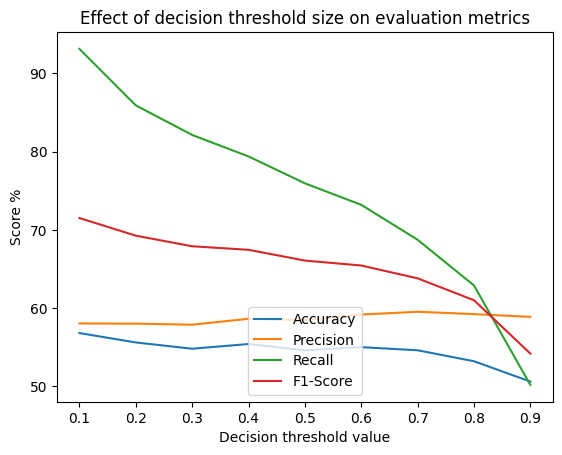

In [32]:
base_df = test_thresh_size(gold, preds)
visualise(base_df)

In [26]:
# load model, test on test set
attn_model = CIFAKE_CNN(attn=True)
attn_model.load_state_dict(torch.load(config['attn_model']))
gold_attn, preds_attn, eval_attn = quick_eval(attn_model)

  0%|          | 0/250 [00:00<?, ?it/s]


Performance (n=500 test imgs, decision threshold=0.5)
Overall accuracy: 54.00%

              score
precision  0.585434
recall     0.718213
f1-score   0.645062


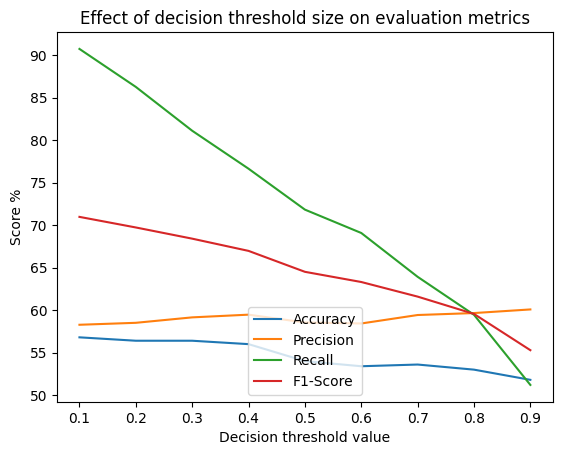

In [33]:
attn_df = test_thresh_size(gold_attn, preds_attn)
visualise(attn_df)

In [27]:
# load model, test on test set
mini_model = CIFAKE_CNN()
mini_model.load_state_dict(torch.load(config['mini_model']))
gold_mini, preds_mini, eval_mini = quick_eval(mini_model)

  0%|          | 0/250 [00:00<?, ?it/s]


Performance (n=500 test imgs, decision threshold=0.5)
Overall accuracy: 58.00%

              score
precision  0.668050
recall     0.553265
f1-score   0.605263


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

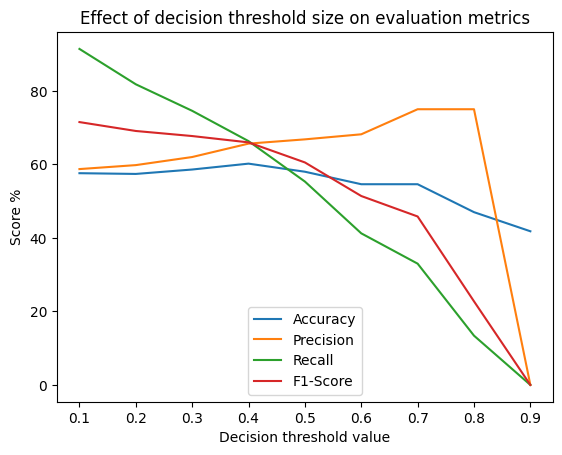

In [34]:
mini_df = test_thresh_size(gold_mini, preds_mini)
visualise(mini_df)

In [13]:
# examine falsely flagged imgs?